**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [2]:
TXT_FOLDER_INP = "encode_e2g_benchmark"
TXT_FOLDER_OUT = "encode_e2g_benchmark"

In [3]:
txt_fdiry = file.path(FD_REF, "encode_e2g_benchmark")
vec = dir(txt_fdiry)
for(txt in vec){
    cat(txt, "\n")
}

EPCrisprBenchmark_ensemble_data_GRCh38.filtered.tsv 
EPCrisprBenchmark_ensemble_data_GRCh38.tsv 
RefSeqCurated.170308.bed.CollapsedGeneBounds.hg38.TSS500bp.bed 


In [4]:
txt_fdiry = file.path(FD_REF, "encode_e2g_prediction")
vec = dir(txt_fdiry)
for(txt in vec){
    cat(txt, "\n")
}

ENCODE_K562_hg38_E2G.tsv 


## Import data

In [5]:
txt_fdiry = file.path(FD_REF, TXT_FOLDER_INP)
txt_fname = "EPCrisprBenchmark_ensemble_data_GRCh38.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_e2g_import = dat
print(dim(dat))
head(dat)

[1] 10412    25


dataset,chrom,chromStart,chromEnd,name,EffectSize,chrTSS,startTSS,endTSS,measuredGeneSymbol,⋯,Reference,Regulated,PowerAtEffectSize10,PowerAtEffectSize15,PowerAtEffectSize20,PowerAtEffectSize50,pair_uid,merged_uid,merged_start,merged_end
<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,⋯,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
FlowFISH_K562,chr1,3774714,3775214,CEP104|chr1:3691278-3691778:*,-0.293431866,chr1,3857213,3857214,CEP104,⋯,Ulirsch2016,TRUE,NA,NA,NA,NA,FlowFISH_K562|CEP104|chr1:3691278-3691778:*,1,3774714,3775214
FlowFISH_K562,chr1,3774714,3775214,LRRC47|chr1:3691278-3691778:*,-0.331178093,chr1,3796503,3796504,LRRC47,⋯,Ulirsch2016,TRUE,NA,NA,NA,NA,FlowFISH_K562|LRRC47|chr1:3691278-3691778:*,2,3774714,3775214
Gasperini2019,chr1,3803570,3805848,LRRC47|chr1:3720134-3722412:.,-0.001471265,chr1,3796503,3796504,LRRC47,⋯,"Gasperini et al., 2019",FALSE,0.40,0.80,0.85,1,Gasperini2019|LRRC47|chr1:3720134-3722412:.,3,3803570,3805848
FlowFISH_K562,chr1,3774714,3775214,SMIM1|chr1:3691278-3691778:*,-0.472019217,chr1,3772761,3772762,SMIM1,⋯,Ulirsch2016,TRUE,NA,NA,NA,NA,FlowFISH_K562|SMIM1|chr1:3691278-3691778:*,4,3774714,3775214
Gasperini2019,chr1,3803570,3805848,SMIM1|chr1:3720134-3722412:.,0.025676924,chr1,3772788,3772789,SMIM1,⋯,"Gasperini et al., 2019",FALSE,0.80,0.85,1.00,1,Gasperini2019|SMIM1|chr1:3720134-3722412:.,5,3803570,3805848
Gasperini2019,chr1,4126791,4127291,SMIM1|chr1:4186851-4187351:.,0.023383787,chr1,3772788,3772789,SMIM1,⋯,"Gasperini et al., 2019",FALSE,0.55,0.80,0.90,1,Gasperini2019|SMIM1|chr1:4186851-4187351:.,6,4126791,4127291


In [6]:
txt_fdiry = file.path(FD_REF, "encode_e2g_benchmark")
txt_fname = "RefSeqCurated.170308.bed.CollapsedGeneBounds.hg38.TSS500bp.bed"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, col_names=FALSE, show_col_types = FALSE)

dat_region_tss_import = dat
print(dim(dat))
head(dat)

[1] 24461     6


X1,X2,X3,X4,X5,X6
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
chr1,11623,12123,DDX11L1,0,+
chr1,29120,29620,WASH7P,0,-
chr1,35831,36331,FAM138A,0,-
chr1,35831,36331,FAM138F,0,-
chr1,68840,69340,OR4F5,0,+
chr1,140316,140816,LOC729737,0,-


## Filter rows by TSS
filter crispr data for valid connections (e.g. no promoters) and only retain E-G pairs from genes in gene universe

In [7]:
### init
dat = dat_region_e2g_import
tmp = dat_region_tss_import


### filter crispr data for valid connections (e.g. no promoters) and 
### only return E-G pairs from genes
dat = dat %>% dplyr::filter(
    ValidConnection == TRUE, 
    measuredGeneSymbol %in% tmp$X4)

### assign and show
dat_region_e2g_filter = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 10375    25


dataset,chrom,chromStart,chromEnd,name,EffectSize,chrTSS,startTSS,endTSS,measuredGeneSymbol,Significant,pValueAdjusted,PowerAtEffectSize25,ValidConnection,CellType,Reference,Regulated,PowerAtEffectSize10,PowerAtEffectSize15,PowerAtEffectSize20,PowerAtEffectSize50,pair_uid,merged_uid,merged_start,merged_end
FlowFISH_K562,chr1,3774714,3775214,CEP104|chr1:3691278-3691778:*,-0.2934319,chr1,3857213,3857214,CEP104,TRUE,0.0040240,0.8250936,TRUE,K562,Ulirsch2016,TRUE,NA,NA,NA,NA,FlowFISH_K562|CEP104|chr1:3691278-3691778:*,1,3774714,3775214
FlowFISH_K562,chr1,3774714,3775214,LRRC47|chr1:3691278-3691778:*,-0.3311781,chr1,3796503,3796504,LRRC47,TRUE,0.0077712,0.6089942,TRUE,K562,Ulirsch2016,TRUE,NA,NA,NA,NA,FlowFISH_K562|LRRC47|chr1:3691278-3691778:*,2,3774714,3775214
Gasperini2019,chr1,3803570,3805848,LRRC47|chr1:3720134-3722412:.,-0.0014713,chr1,3796503,3796504,LRRC47,FALSE,0.9999184,1.0000000,TRUE,K562,"Gasperini et al., 2019",FALSE,0.4,0.8,0.85,1,Gasperini2019|LRRC47|chr1:3720134-3722412:.,3,3803570,3805848


In [8]:
# this filtered dataset now has the 472 positives from the distal regulation paper
dat = dat_region_e2g_filter
table(dat$Regulated)


FALSE  TRUE 
 9903   472 

In [9]:
dat = dat_region_e2g_filter
lst = split(dat$pValueAdjusted, dat$Regulated)
lst = lapply(lst, summary)
lst

$`FALSE`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.8602  0.9769  0.8856  0.9999  1.0000       1 

$`TRUE`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
0.000000 0.000000 0.000069 0.006860 0.007700 0.049693       16 


**Check distribution of EffectSize and Scale(EffectSize)**

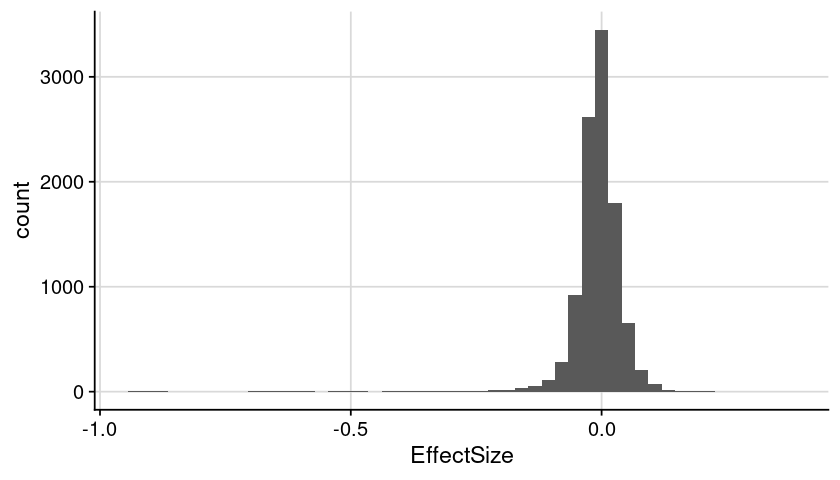

In [10]:
dat = dat_region_e2g_filter
gpt = ggplot(dat, aes(x=EffectSize)) + 
    geom_histogram(bins = 50) +
    theme_cowplot() +
    background_grid()

options(repr.plot.height = 4, repr.plot.width = 7)
print(gpt)

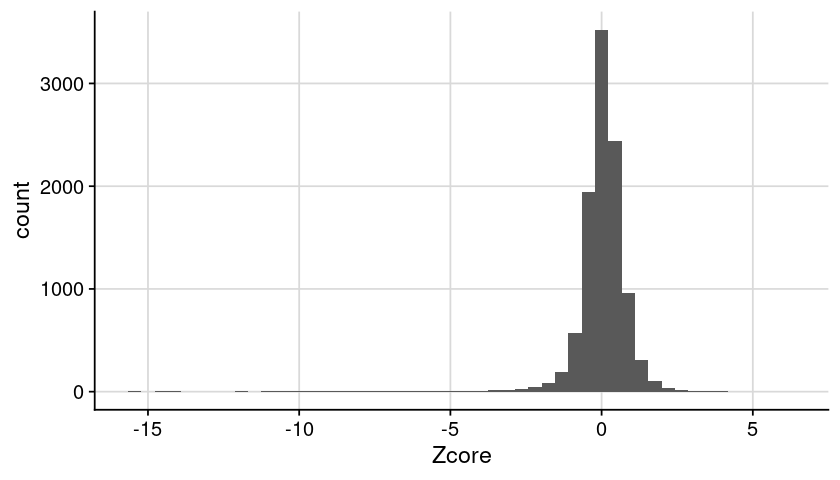

In [11]:
dat = dat_region_e2g_filter
dat = dat %>% dplyr::mutate(Zcore = as.vector(scale(EffectSize)))

gpt = ggplot(dat, aes(x=Zcore)) + 
    geom_histogram(bins = 50) +
    theme_cowplot() +
    background_grid()

options(repr.plot.height = 4, repr.plot.width = 7)
print(gpt)

## Arrange the table

In [15]:
### init
dat = dat_region_e2g_filter
vec = c(
    "Chrom", "ChromStart", "ChromEnd", "Name", 
    "Score", "Zcore",
    "Region", "Target", "NLog10P", "Regulated", "Source",
    "Group",  "Label"
)

### rename column names
dat = dat %>% 
    dplyr::mutate(
        Chrom      = chrom, 
        ChromStart = chromStart, 
        ChromEnd   = chromEnd, 
        Name       = name,
        Target     = measuredGeneSymbol,
        Score      = EffectSize,
        Zcore      = as.vector(scale(EffectSize)),
        NLog10P    = -log10(pValueAdjusted),
        Source     = Reference
    ) %>%
    dplyr::mutate(
        Region = fun_gen_region(Chrom, ChromStart, ChromEnd),
        Group  = "E2G-Benchmark",
        Label  = paste("Regulated", Regulated, sep = ":")
    ) %>%
    dplyr::select(!!!vec)

### assign and show
dat_region_e2g_arrange = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 10375    13


Chrom,ChromStart,ChromEnd,Name,Score,Zcore,Region,Target,NLog10P,Regulated,Source,Group,Label
chr1,3774714,3775214,CEP104|chr1:3691278-3691778:*,-0.2934319,-4.7051440,chr1:3774714-3775214,CEP104,2.3953438,TRUE,Ulirsch2016,E2G-Benchmark,Regulated:TRUE
chr1,3774714,3775214,LRRC47|chr1:3691278-3691778:*,-0.3311781,-5.3312091,chr1:3774714-3775214,LRRC47,2.1095137,TRUE,Ulirsch2016,E2G-Benchmark,Regulated:TRUE
chr1,3803570,3805848,LRRC47|chr1:3720134-3722412:.,-0.0014713,0.1373619,chr1:3803570-3805848,LRRC47,0.0000354,FALSE,"Gasperini et al., 2019",E2G-Benchmark,Regulated:FALSE


## Set colname description

In [16]:
### setup column description
dat = tribble(
    ~Name,              ~Note,
    "Chrom",            "Name of the chromosome",
    "ChromStart",       "The starting position of the feature in the chromosome",
    "ChromEnd",         "The ending position of the feature in the chromosome",
    "Name",             "Name given to a region; Use '.' if no name is assigned.",
    "Score",            "Effect Size",
    "Zcore",            "Z Score",
    "Region",           "Region coordinate of the Region-Gene pair",
    "Target",           "Gene of the Region-Gene pair",
    "NLog10P",          "MinusLog10PValue; -log10 of P-value",
    "Regulated",        "Regulated or not",
    "Source",           "Reference",
    "Group",            "Assay name",
    "Label",            "Region label"
)

### assign and show
dat_cname = dat
fun_display_table(dat)

Name,Note
Chrom,Name of the chromosome
ChromStart,The starting position of the feature in the chromosome
ChromEnd,The ending position of the feature in the chromosome
Name,Name given to a region; Use '.' if no name is assigned.
Score,Effect Size
Zcore,Z Score
Region,Region coordinate of the Region-Gene pair
Target,Gene of the Region-Gene pair
NLog10P,MinusLog10PValue; -log10 of P-value
Regulated,Regulated or not


In [17]:
### double check
vec1 = dat_cname$Name
vec2 = colnames(dat_region_e2g_arrange)
cat("Checked?", all(vec1 == vec2), "\n")

Checked? TRUE 


## Export the results

In [18]:
### set file path
txt_folder = TXT_FOLDER_OUT
txt_fdiry  = file.path(FD_RES, "region", txt_folder)
txt_fname  = "K562.hg38.ENCODE_E2G.benchmark.bed.gz"
txt_fpath  = file.path(txt_fdiry, txt_fname)

### set table
dat = dat_region_e2g_arrange
dat = dat %>% dplyr::arrange(Chrom, ChromStart, ChromEnd)

### save table
dir.create(txt_fdiry, showWarnings = FALSE)
write_tsv(dat, txt_fpath, col_names = FALSE)

In [19]:
### set file path
txt_folder = TXT_FOLDER_OUT
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")
txt_fname  = "K562.hg38.ENCODE_E2G.benchmark.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

### set table
dat = dat_region_e2g_arrange
dat = dat %>% dplyr::arrange(Chrom, ChromStart, ChromEnd)

### save table
dir.create(txt_fdiry, showWarnings = FALSE)
write_tsv(dat, txt_fpath)

In [20]:
txt_folder = TXT_FOLDER_OUT
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")
txt_fname  = "description.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

### set table
dat = dat_cname

### save table
dir.create(txt_fdiry, showWarnings = FALSE)
write_tsv(dat, txt_fpath)